In [1]:
from IPython.display import display, HTML # type:ignore
style = "<style> body { font-family: Oswald; font-size: 16px; } </style>"
display(HTML(style))

# gettingMNIST


In [3]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784',as_frame=False)
mnist



/home/icode100/pyenv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
dat = mnist['data']
val = mnist['target']
print(type(dat))

<class 'numpy.ndarray'>


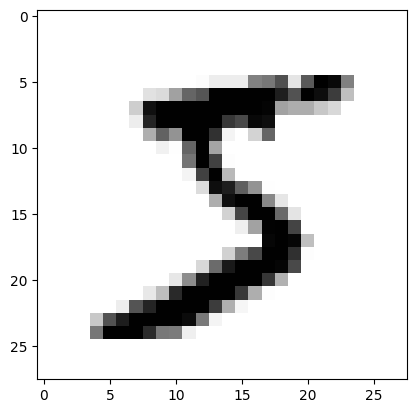

In [80]:

import matplotlib
import matplotlib.pyplot as plt
random_digit = dat[0].reshape(28,28)
# len(random_digit)
# len(random_digit[0])
plt.imshow(random_digit,cmap='gist_gray_r')

_now we make the function for the above_

In [81]:
import matplotlib
import matplotlib.pyplot as plt
def plot_image(index):
    if index<70000:
        m = mnist['data']
        n = m[index]
        n = n.reshape(28,28)
        plt.imshow(n,cmap='gist_gray_r')

'5'

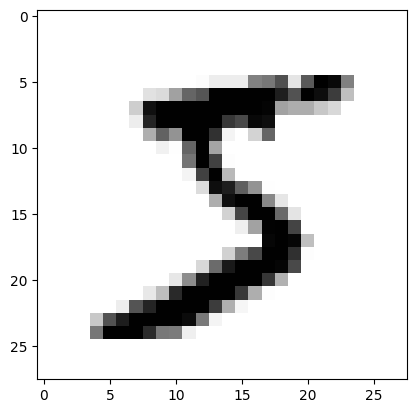

In [82]:
plot_image(0)
val[0]

the mnist dataset is already splitted into training and test set 
the first 60000 rows are training and rest are testing

In [9]:
dat_train,dat_test,val_train,val_test = dat[:60000],dat[60000:],val[:60000],val[60000:]
frame = pd.DataFrame(mnist.data,columns=mnist.feature_names)
frame
# mnist.feature_names
valFrame = pd.DataFrame(val)
valFrame

,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [10]:
# #shuffling the training set so that accidental similar data do not appear in sequence
# import numpy as np
# shuffle = np.random.permutation(60000)
# dat_train,val_train = dat_train[shuffle],val_train[shuffle]


# Training a binary classifier

this is detector btwn -> class and not a class \
&nbsp;thus binary\
we will use stocastic gradient descent classifier\
SDGClassifier

In [11]:

val_train_5 = (val_train=='5')
val_test_5 = (val_test=='5')


In [12]:
from sklearn.linear_model import SGDClassifier
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(dat_train,val_train_5)


SGDClassifier(random_state=42)

In [13]:
#now predicting values

sdg_clf.predict([dat[0]])

array([ True])

# performance measures

### cross validation

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sdg_clf,dat_train,val_train,cv=3,scoring='accuracy')
scores

array([0.87365, 0.85835, 0.8689 ])

### confusion-matrix 

---

the mainidea is to count the number of instances of class A being identified as class B. \
for example,\
to know the number of times classifier confused the image of 5 with 3 we would look in the 5th row and 3rd column \
i.e. correct number row and wrong number column

---
to compute the confusion matrix we need set of predictions \
we will not be using the test set out here \
we use cross val predictor

---

```
from sklearn.model_selection import cross_val_predict
val_train_predict = cross_val_predict(sdg_clf,dat_train,val_train_5,cv=3)
```


In [15]:
from sklearn.model_selection import cross_val_predict
val_train_predict = cross_val_predict(sdg_clf,dat_train,val_train_5,cv=3)
val_train_predict

array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_train_5,val_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

1. each row represent actual class while column represent predicted class
2. first row represents negative class or the classes not identified as 5 
3. here mat[0][0] represents that 53892 of the data were correctly idetified as not being 5 and mat[0][1] says 687 were wrongly identified as 5 while they were not 5
4. similarly mat[1][0] represents 1891 were wrongly identified as not 5 while they were 5 and mat[1][1] says 3530 were correctly identified as 5
5. this is actually type 1 and type 2 error in stocastic process

---
```
[[true-negative],[false-positive]
 [false-negative ],[true-positive]]
```
---
thus we define precision as
```
                      True-posiive 
precision =    ---------------------------- 
               true-positive+false-positive 

or, 
    mat[1][1]
--------------------
mat[0][1]+mat[1][1]
```
and also recall as 
```
          TP
recall = ----
         TP+FN
        
```
it is the ratio of positive instances detected correctly to the total correct instances

In [17]:
# precision and recall 
from sklearn.metrics import precision_score,recall_score
print(precision_score(val_train_5,val_train_predict))
print(recall_score(val_train_5,val_train_predict))

0.8370879772350012
0.6511713705958311


this represents that only 65% of the time 5 were detected and it is 83% precise

here comes the role of F1 score 
```
            precision x recall
F1 = 2 x  ---------------------
            precision + recall

```

In [18]:
from sklearn.metrics import f1_score
print(f1_score(val_train_5,val_train_predict))

0.7325171197343846


increasing precision reduces recall \
F1 favours classifiers that have similar recall and precision\
classifier will get high F1 score only if the precision and recall are high\
but increasing precision reduces recall and vice versa 
  

### precision / recall tradeoff

we can set the threshold scores for classifiers to determine if the score more than threshold classify poisitive else negative

In [19]:
val_scores = sdg_clf.decision_function([dat[0]])
val_scores

array([2164.22030239])

In [20]:
threshold = 2164
val_digit_pred = (val_scores > threshold)
val_digit_pred

array([ True])

In [21]:
threshold = 2164.3
val_digit_pred = (val_scores > threshold)
val_digit_pred

array([False])

how to decide the proper threshold:-

In [22]:
val_scores = cross_val_predict(sdg_clf,dat_train,val_train_5,cv=3,method="decision_function")
val_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [23]:
len(val_scores)

60000

with these scores we can compute the precision and recall for all the possible thresholds using precision recall curve

In [24]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(val_train_5,val_scores)
print(len(precisions),len(recalls),len(thresholds))

60001 60001 60000


In [25]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])



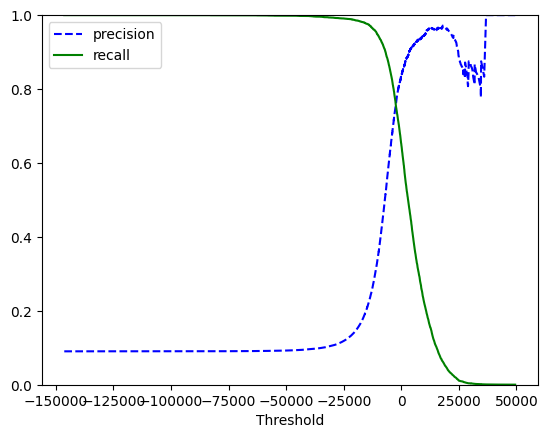

In [26]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

we can observe around 90% precision at a threshold of around 3000 thus 

In [27]:
val_train_predict_90 = (val_scores > 3000)

In [28]:
precision_score(val_train_5,val_train_predict_90)

0.8911317008603574

also we notice the recall is around 50% 

In [29]:
recall_score(val_train_5,val_train_predict_90)

0.4967718133185759

now here we plot the precision recall curve or the PR curve 

In [30]:
def plot_PR(precisions,recalls):
    plt.plot(precisions[:-1],recalls[:-1],'r-')
    plt.axis([0,1,0,1])

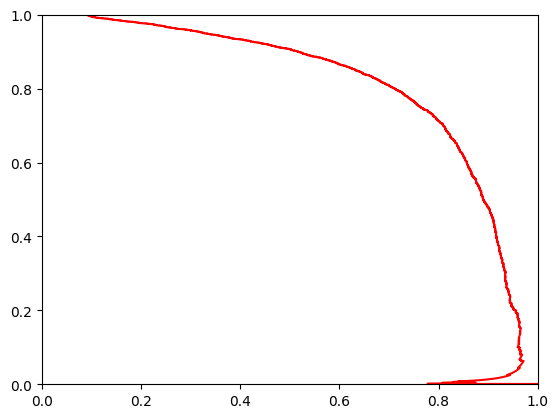

In [31]:
plot_PR(precisions,recalls)

### The ROC Curve 
* it stands for reciever operating characteristics curve
* it plots the _true positive rate_(or recall) against _false positive rate_ 
* FPR = negative instances incorrectly classified as positive = 1 - *true negative rate*
* *true negative rate* TNR is also called *specificity*.
* hence ROC plots *sensitivity* (recall) _v/s_ *1-specificity*

In [32]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(val_train_5,val_scores)


In [33]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,'b-',linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r--') #this is for the dotted line representing pure random classifier used as a reference
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

    

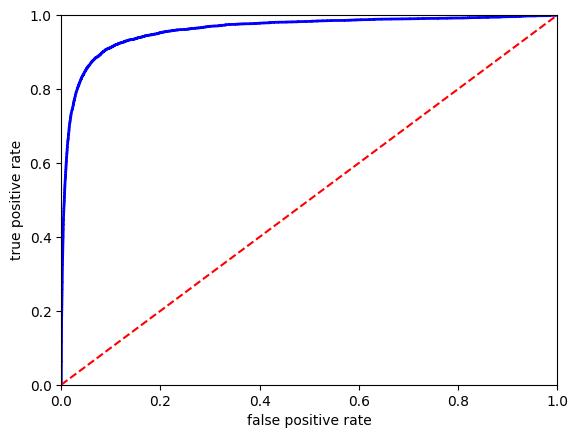

In [34]:
plot_roc_curve(fpr,tpr)

a good classifier stay away as far as possible from the dotted line
* one way to measure classifier is area under the curve 
* a perfect classifier have AUC as 1
* random classifier have AUC as 0.5


In [35]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(val_train_5,val_scores)
auc_score

0.9604938554008616

we use the PR curve when positive class is rare or when we care more about the *false positives* rather than *false negatives* and roc curve otherwise. As an example here we are having few positives (5s) thus here ROC is giving a good score but not the PR (a good PR curve could be closer to the top-right corner)

### Training via RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
val_prob_forest = cross_val_predict(forest_clf,dat_train,val_train_5,cv=3,method='predict_proba')
                            

as random forest works on the probability of belonging to a particular class but while plotting curve we need scores thus we use the positive class probabilites as the scores

In [37]:
val_prob_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [38]:
val_scores_forest = val_prob_forest[:,1] # val_prob_forest[slice, key] here key by default represents the index in the individual array to sleect
print(val_scores_forest)
fpr_forest,tpr_forest,threshold_forest = roc_curve(val_train_5,val_scores_forest)

[0.89 0.01 0.04 ... 0.98 0.08 0.06]


now we plot the curve along with the ROC curve for simple gradient descent classifier

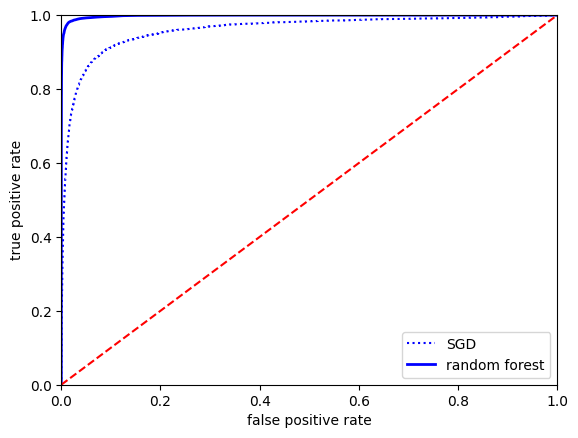

In [39]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,label="random forest")
plt.legend(loc="lower right")
plt.show()

as we can see the random forest curve is way away from the random classifier curve thus it is a better classifier

now we can calculate the AUC score and compare

In [40]:
roc_auc_score(val_train_5,val_scores_forest)

0.9983436731328145

In [41]:
val_train_predict_forest = (val_scores_forest >=0.5)

In [42]:
print(val_train_5)
print(val_train_predict_forest)


[ True False False ...  True False False]
[ True False False ...  True False False]


In [43]:
precision_score(val_train_5,val_train_predict_forest)

0.9897468089558485

In [44]:
recall_score(val_train_5,val_train_predict_forest)

0.8725327430363402

now this is a good score as it gives higher value to both precision and recall thus we can call this as a good model

# Multiclass Classification


one method is to use multiple binary classifiers train them and then while testing them, test the test set against all classifiers find the decision score and choose the classifier with maximum decision score. This is *One-versus-all* stratergy

In [45]:
sdg_clf_v2 = SGDClassifier(random_state=42)
sdg_clf_v2.fit(dat_train,val_train)

SGDClassifier(random_state=42)

In [46]:
sdg_clf_v2.predict([dat[0]])

array(['3'], dtype='<U1')

In [47]:
digit_scores = sdg_clf_v2.decision_function([dat[0]])
digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [48]:
import numpy as np
np.argmax(digit_scores)

3

In [49]:
sdg_clf_v2.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [50]:
forest_clf_v2 = RandomForestClassifier(random_state=42)
forest_clf_v2.fit(dat_train,val_train)

RandomForestClassifier(random_state=42)

now random forest can classify without OvA or OvO\
by calling the ```forest_clf_v2.predict_proba([])``` we can see the probabilities of the data belonging to a particular class it is like giving decision scores. This is because Random Forest algorithms work on the probabilities while performing dfs and choosing the path


In [51]:
forest_clf_v2.predict([dat[0]])

array(['5'], dtype=object)

In [52]:
forest_clf_v2.predict_proba([dat[0]])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

# Error Ananlysis

we first scale the data to standardization for better accuracy

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat_train_scaled = scaler.fit_transform(dat_train.astype(np.float64))

now we convert the val_train to a boolean predicted array

In [54]:
val_train_pred = cross_val_predict(sdg_clf_v2,dat_train_scaled,val_train,cv=3)


now we create the confusion matrix

In [55]:
conf_mx = confusion_matrix(val_train,val_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

to analyse this let's plot the graph for it

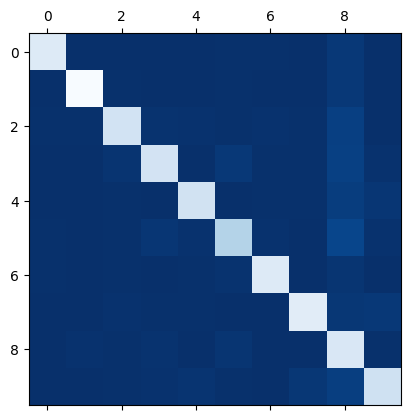

In [62]:
plt.matshow(conf_mx,cmap='Blues_r')
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictions(val_train,val_train_pred)

now we can note that most values are on the diagonal thus they are evaluated true-positives (or false-negatives) and for 5 the color is darker that is less value in confusion matrix for true positive this might be because there are few number of 5s

now lets focus the plot on errors. Firsst, we need to divide the value in the confusion matrix by the number of images in corresponind class, so we can judge the relative error rates rather than absolute numbers

In [57]:
row_sum = conf_mx.sum(axis=1,keepdims=True) #keepdimensions for returning the row_sum as same dimension as conf_mx
row_sum

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [58]:
norm_conf_mx = conf_mx/row_sum
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

now to detect the errors we need to eliminate the true positives that is the diagonal elements
using ```np.fill_diagonal(norm_conf_mx,0)```

In [59]:
np.fill_diagonal(norm_conf_mx,0)

now we plot the errors

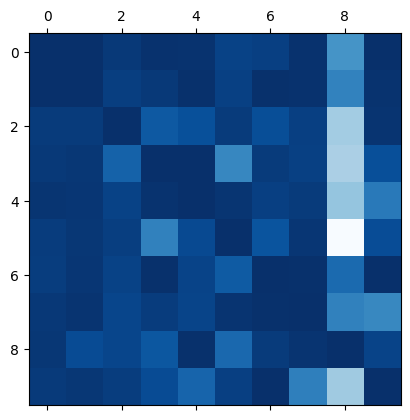

In [60]:
plt.matshow(norm_conf_mx,cmap='Blues_r')

**inferences**
* now we can see all the diagonal elements set to 0 the maximum value in the ```norm_conf_mx``` painted in dark as
* also columns for 8 and 9 are quite bright represting that they are detected with most errors(as lighter color means smaller values) same with the rows of 8 and 9
* errors are not symmetrical more 5 as misclassified as 8 but the reverse isn't true
* thus it gives insights on errors and where can we improve classifier
* say we can gather more data for 8 and 9 classification
* we can add more features for their detection or we can preprocess the data to make some patters stand out

# Multilabel Classification

It outputs multiple labels rather than single one 
for example in a face recognition system we have three labels those three labels needs to be output as a single result ```[0,0,0],[0,0,1],[1,0,0]``` and so on we have 8 possibilities. this is what is multilabel classification\
One of the classifiers that can do that for us is KNeighbourClassifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
val_train_big = (val_train.astype(int) >= 7)
val_train_odd = (val_train.astype(int) %2 == 1)
print(val_train_big)
print(val_train_odd)

[False False False ... False False  True]
[ True False False ...  True False False]


now we make multilabel by concatenating the values (ofcourse columnwise)

In [92]:
val_multilabel = np.c_[val_train_big,val_train_odd]
val_multilabel


array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

now we train ```knn_clf``` on these values as labels

In [93]:
knn_clf.fit(dat_train,val_multilabel)

KNeighborsClassifier()

In [101]:
print(forest_clf_v2.predict([dat[4]]))
print(knn_clf.predict([dat[4]]))

['9']
[[ True  True]]


now for error and performance analysis we can use F1 scores for each of the labels


In [105]:
val_train_knn_pred = cross_val_predict(knn_clf,dat_train,val_multilabel,cv=3)

In [106]:
f1_score(val_multilabel,val_train_knn_pred,average='macro')

0.976410265560605

but this is ofcourse useful only if all the labels are of same weight in case of different weight we can use the following

In [108]:
f1_score(val_multilabel,val_train_knn_pred,average='weighted')

0.9778357403921755

# Multioutput Classification

an example of this can be noise removal from the image as multioutput means a label can have several outputs like in mnist each of the 784 pixel can have any value from 0 to 255
in the removal of noise the labels generated can have multiple output ranging from 0 to 255

first let us add noise to the images

In [109]:
noise = np.random.randint(0,100,(len(dat_train),784))
dat_train_mod = dat_train + noise
noise = np.random.randint(0,100,(len(dat_test),784))
dat_test_mod = dat_test + noise

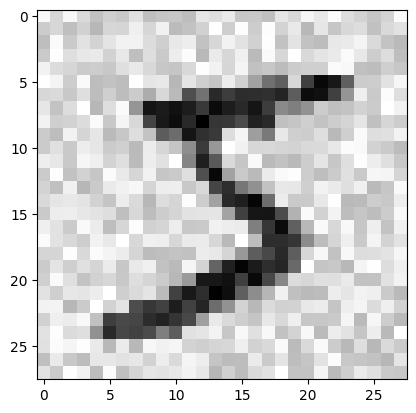

In [112]:
plt.imshow(dat_train_mod[0].reshape(28,28),cmap='gist_gray_r')

now we remove the nosie\
for that first we need to set the val_train_mod
```
val_train_mod = dat_train
val_test_mod = dat_test
```

In [113]:
val_train_mod = dat_train
val_test_mod = dat_test


In [114]:
knn_clf_v2 = KNeighborsClassifier()
knn_clf_v2.fit(dat_train_mod,val_train_mod)

KNeighborsClassifier()

In [115]:
clean_digit = knn_clf_v2.predict([val_test_mod[0]])


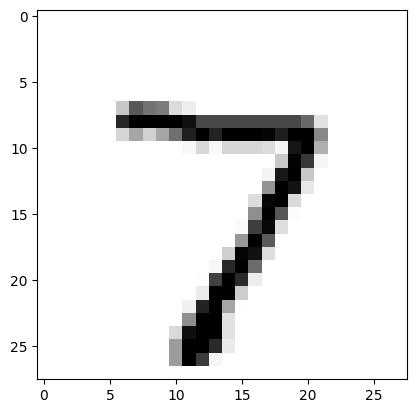

In [119]:

plt.imshow(val_test_mod[0].reshape(28,28),cmap='Greys')


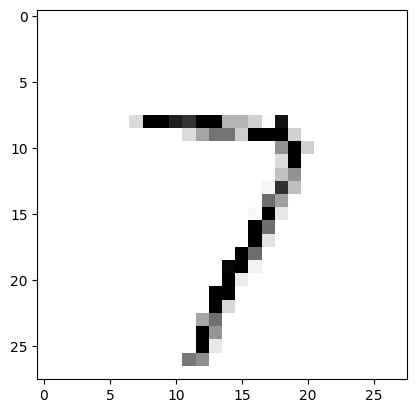

In [120]:
plt.imshow(clean_digit.reshape(28,28),cmap='Greys')

thus the above image looks clean due to the removal of the noise 


---
---
---
---